In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


In [4]:
print('Shape of training set is > ', x_train.shape)
print('Shape of testing set is > ', x_test.shape)


Shape of training set is >  (50000, 32, 32, 3)
Shape of testing set is >  (10000, 32, 32, 3)


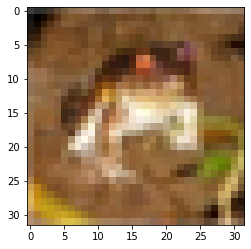

In [5]:
#show a random image
plt.imshow(x_train[0])

In [6]:
# check on the labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
# one hot encoding our labels
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [8]:
# Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense


In [9]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2)

In [13]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=early_stop)

Epoch 1/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9812 - accuracy: 0.3223 - val_loss: 1.6383 - val_accuracy: 0.4017

In [14]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

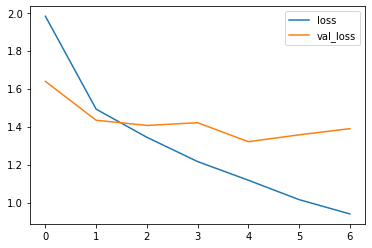

In [15]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

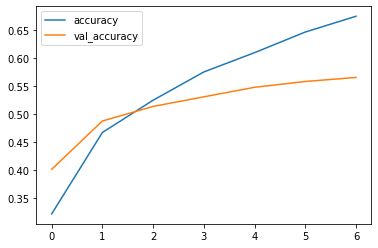

In [16]:
metrics[['accuracy','val_accuracy']].plot()

In [17]:
from sklearn.metrics import classification_report

In [18]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.74      0.45      0.56      1000
           1       0.74      0.65      0.69      1000
           2       0.54      0.38      0.44      1000
           3       0.41      0.25      0.31      1000
           4       0.51      0.46      0.48      1000
           5       0.38      0.69      0.49      1000
           6       0.58      0.75      0.66      1000
           7       0.65      0.64      0.64      1000
           8       0.73      0.63      0.67      1000
           9       0.57      0.74      0.64      1000

    accuracy                           0.57     10000
   macro avg    

In [19]:
#predict class of a single image
model.predict_classes(x_test[0].reshape(1,32,32,3))

array([3])